In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('conference\Acc_Clean_data.csv')
data.head()

,Crash severity,Day of the week,Is weekend,Holiday,Is in school zone,Intersection,On state highway,Urban or open speed zone,Junction type,Road curvature,...,Surface type,Primary surface condition,Natural Light,Primary weather,Alcohol Suspected,Drugs Involved,Licence type,Licence status,Road user age,Gender
0,2,1,0,0,1,1,0,0,6,1,...,1,1,1,1,0,0,1,1,54,2
1,2,2,0,0,0,0,0,0,1,0,...,1,1,1,1,1,0,1,1,82,2
2,2,6,1,0,1,1,0,0,6,0,...,1,1,2,1,0,0,1,1,63,2
3,2,2,0,0,1,1,0,0,2,0,...,1,1,1,1,1,0,1,3,28,1
4,2,1,0,0,1,1,0,0,6,1,...,1,1,3,1,0,0,1,1,23,1


In [104]:
x=data[[ 'Day of the week', 'Is weekend',  'Holiday', 'Is in school zone', 'Intersection', 'On state highway', 'Urban or open speed zone',  'Junction type', 'Road curvature', 'Gradient', 'Surface type', 'Primary surface condition', 'Natural Light', 'Primary weather', 'Alcohol Suspected', 'Drugs Involved', 'Licence type', 'Licence status ', 'Road user age', 'Gender']]


In [105]:
y=data["Crash severity"]


#InBalanced data handle using SMOTE

In [106]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
  dist = round(v / len(y) * 100, 2)
  print(f"Class={k}, n={v} ({dist})")

Class=2, n=12204 (88.6)
Class=1, n=1571 (11.4)


<BarContainer object of 2 artists>

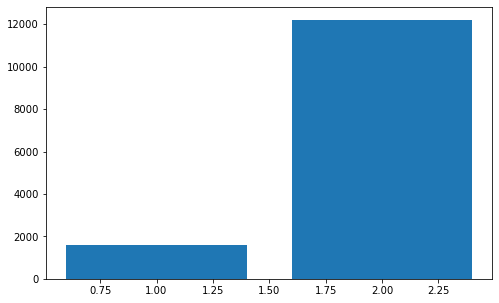

In [107]:
plt.figure(1, figsize=(8, 5))
plt.bar(counter.keys(), counter.values())

In [108]:

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import  Pipeline

In [109]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o", oversample), ("u", undersample)]
pipeline = Pipeline(steps=steps)
x, y =pipeline.fit_resample(x, y)

In [110]:

counter = Counter(y)
for k,v in counter.items():
  dist = v / len(y) * 100
  print(f"Class={k}, n={v} ({dist})")

Class=1, n=12204 (50.0)
Class=2, n=12204 (50.0)


<BarContainer object of 2 artists>

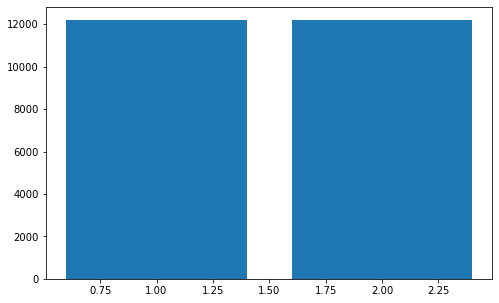

In [111]:
plt.figure(1, figsize=(8, 5))
plt.bar(counter.keys(), counter.values())

In [11]:

scaler = MinMaxScaler()
features = [ 'Day of the week', 'Is weekend', 'Holiday', 'Is in school zone', 'Intersection', 'On state highway', 'Urban or open speed zone',  'Junction type', 'Road curvature', 'Gradient', 'Surface type', 'Primary surface condition', 'Natural Light', 'Primary weather', 'Alcohol Suspected', 'Drugs Involved', 'Licence type', 'Licence status ', 'Road user age', 'Gender']
data[features] = scaler.fit_transform(data[features])
data.head()

,Crash severity,Day of the week,Is weekend,Holiday,Is in school zone,Intersection,On state highway,Urban or open speed zone,Junction type,Road curvature,...,Surface type,Primary surface condition,Natural Light,Primary weather,Alcohol Suspected,Drugs Involved,Licence type,Licence status,Road user age,Gender
0,2,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.714286,1.0,...,1.0,0.333333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.463415,1.0
1,2,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,1.0,0.333333,0.000000,0.0,0.5,0.0,0.0,0.000000,0.804878,1.0
2,2,0.833333,1.0,0.0,1.0,1.0,0.0,0.0,0.714286,0.0,...,1.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.000000,0.573171,1.0
3,2,0.166667,0.0,0.0,1.0,1.0,0.0,0.0,0.142857,0.0,...,1.0,0.333333,0.000000,0.0,0.5,0.0,0.0,0.333333,0.146341,0.0
4,2,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.714286,1.0,...,1.0,0.333333,0.666667,0.0,0.0,0.0,0.0,0.000000,0.085366,0.0


#Feature analysis using Permutation test

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn import datasets
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.80)


In [117]:
clf_models = []
clf_models.append(('Ada',   XGBClassifier()))
for name, model in clf_models:
   exec(f'clf_{name} = model.fit(X_train, Y_train)')
   msg = "Model: clf_%s , Score:%.2f" % (name, model.score(X_train, Y_train))
   print(msg)
   print(confusion_matrix(Y_test, model.predict(X_test)))
   print('')

C:\Users\sahmed1\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model: clf_Ada , Score:0.88
[[2053  415]
 [ 502 1912]]



Feature:, value: %.5f (Index(['Licence status ', 'Surface type', 'Drugs Involved', 'Holiday',
       'Urban or open speed zone', 'Primary weather', 'Gradient',
       'Is in school zone', 'Is weekend', 'Road curvature',
       'Primary surface condition', 'Licence type', 'On state highway',
       'Junction type', 'Gender', 'Intersection', 'Natural Light',
       'Alcohol Suspected', 'Day of the week', 'Road user age'],
      dtype='object'), array([0.00503933, 0.00653884, 0.01060308, 0.01134874, 0.01877253,
       0.0225254 , 0.02480334, 0.0254097 , 0.02577024, 0.0266552 ,
       0.03155523, 0.03219436, 0.03911832, 0.05125369, 0.0541216 ,
       0.05770239, 0.05915274, 0.05942314, 0.06626516, 0.13102262]))


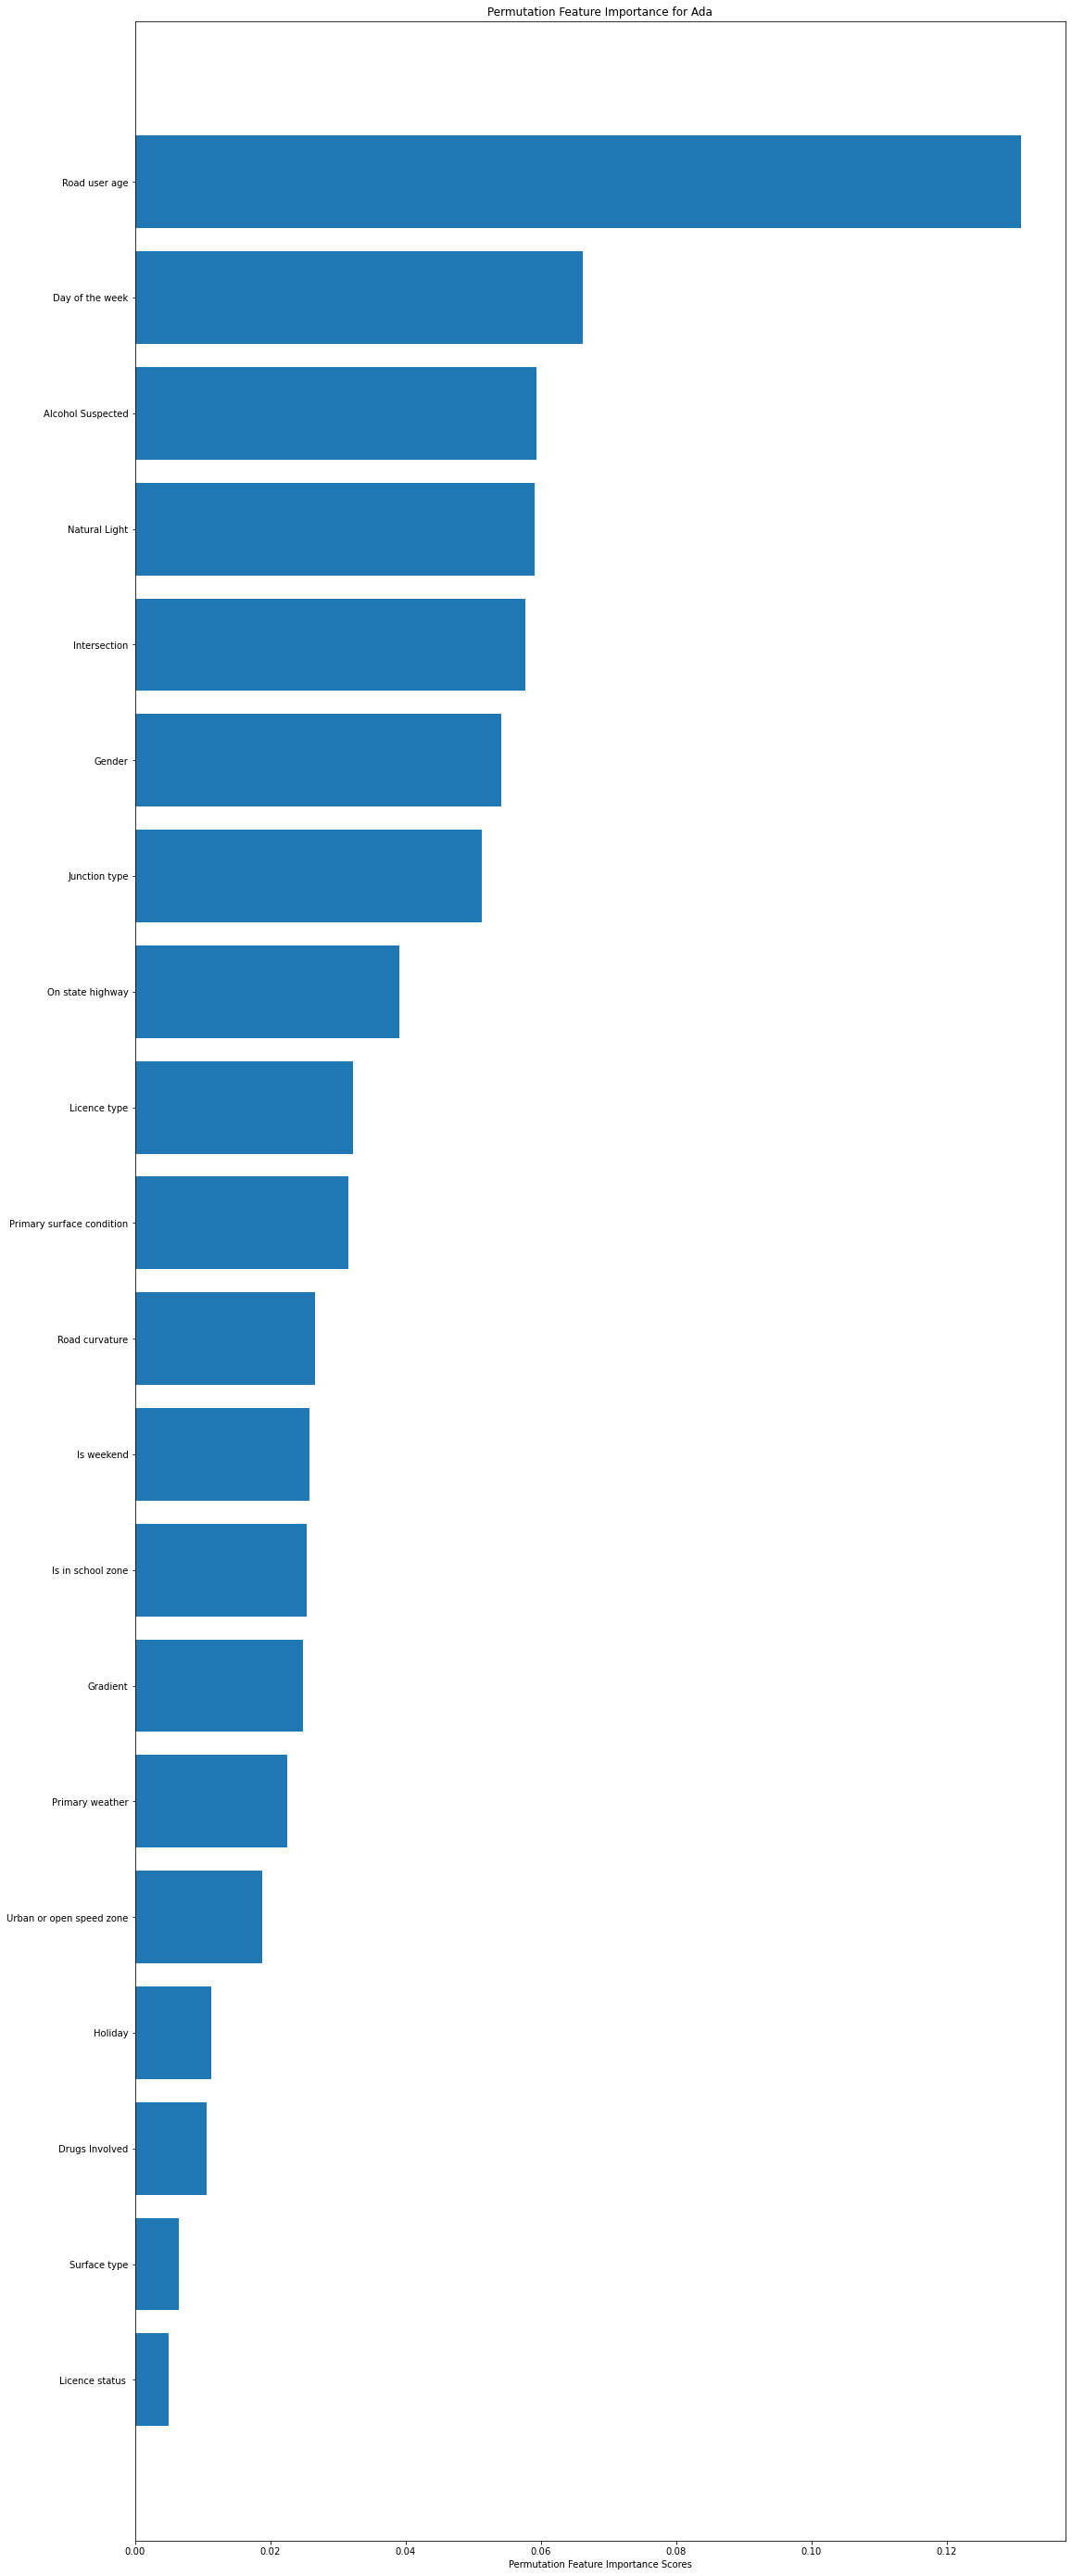

In [118]:
for name, model in clf_models:
  # perform permutation importance
  results = permutation_importance(model, x, y, scoring='accuracy')
  # get importance
  importance = results.importances_mean
  #print(importance)
  sorted_idx = np.argsort(importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  plt.subplots(figsize=(18,50))
  plt.barh(pos, importance[sorted_idx], align='center')
  #print(pos, importance[sorted_idx])
  #Imp=(x.columns[sorted_idx],pos)
  print('Feature:, value: %.5f' , (x.columns[sorted_idx],importance[sorted_idx]))
  plt.yticks(pos, x.columns[sorted_idx])
  plt.xlabel('Permutation Feature Importance Scores')
  plt.title('Permutation Feature Importance for %s' % name)
  plt.show()

In [63]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()
accuracy_lst=[]
precision_lst=[]
f1Score_lst=[]
recall_lst=[]

In [64]:

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80)


#Random Forest

In [65]:
M_RF = RandomForestClassifier(n_estimators=100,criterion='entropy')
M_RF.fit(x_train,y_train)
RF_Pred = M_RF.predict(x_train)
RF_Rred1 = M_RF.predict(x_test)

In [49]:
from sklearn.model_selection import cross_validate
cv = cross_validate(M_RF, x_train, y_train, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.87096774 0.86994368 0.86943164 0.86175115 0.85509473 0.85663082
 0.86270492 0.87038934 0.85502049 0.86219262]
0.8634127141514106


In [66]:
acc_random_forest = round(M_RF.score(x_train, y_train) * 100, 2)
acc_random_forest1 = round(M_RF.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, RF_Rred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, RF_Rred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, RF_Rred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_random_forest1)
precision_lst.append(P_Score2)
f1Score_lst.append(f1_Score2)
recall_lst.append(R_Score2)

print("\nTrain Accuracy", acc_random_forest)
print("Test Accuracy", acc_random_forest1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)


Train Accuracy 99.23
Test Accuracy 86.97
F1 Score 86.96
Precision Score 87.04
Recall Score 86.94


In [67]:
print('\nClassification Report for Training\n')
c_rf = classification_report(y_test,RF_Rred1)
print(c_rf)


Classification Report for Training

              precision    recall  f1-score   support

           1       0.86      0.89      0.87      2474
           2       0.88      0.85      0.87      2408

    accuracy                           0.87      4882
   macro avg       0.87      0.87      0.87      4882
weighted avg       0.87      0.87      0.87      4882



y_pred = M_RF.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=RF_Rred1)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

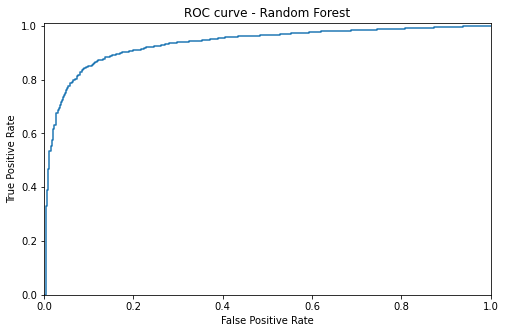

In [68]:
Ye = label_binarize(y_test, classes=[1, 2])
y_score = M_RF.predict_proba(x_test)
fpr["Random Forest"], tpr["Random Forest"], _= roc_curve(Ye[:,0], y_score[:,0])

plt.figure(figsize=(8, 5))
plt.step(tpr["Random Forest"],fpr["Random Forest"],  where="post")

plt.title("ROC curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#LR

In [69]:
xtrain, xval, ytrain, yval = train_test_split(x_train, y_train, train_size=0.8) 

In [70]:
acc=np.zeros(6)
i=0
for c in [0.5, 0.1, 0.01, 0.001, 10, 100]:
    lr = LogisticRegression(C=c, solver='liblinear').fit(xtrain, ytrain)
    yhat = lr.predict(xval)
    acc[i] = accuracy_score(yval,yhat)
    i+=1
acc

array([0.71428571, 0.71351767, 0.69738863, 0.65847414, 0.71658986,
       0.71658986])

In [71]:
M_LR = LogisticRegression(C=0.001, solver='liblinear').fit(x_train, y_train)
#t_lr = time.time()-t0
#print('Time taken :' , t_lr)
LR_Pred = M_LR.predict(x_train)
LR_Pred1 = M_LR.predict(x_test)


In [72]:

acc_lr = round(M_LR.score(x_train, y_train) * 100, 2)
acc_lr1 = round(M_LR.score(x_test, y_test) * 100, 2)
f1_Score1 = round(f1_score(y_test, LR_Pred1, average='macro') * 100, 2)
P_Score1 = round(precision_score(y_test, LR_Pred1, average='macro') * 100, 2)
R_Score1 = round(recall_score(y_test, LR_Pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_lr1)
precision_lst.append(P_Score1)
f1Score_lst.append(f1_Score1)
print("\nTrain Accuracy", acc_lr)
print("Test Accuracy", acc_lr1)
print("F1 Score", f1_Score1)
print("Precision Score", P_Score1)
print("Recall Score", R_Score1)


Train Accuracy 66.23
Test Accuracy 65.71
F1 Score 65.64
Precision Score 65.96
Recall Score 65.79


In [73]:
print('\nClassification Report for Training\n')
c_lr = classification_report(y_test,LR_Pred1)
print(c_lr)


Classification Report for Training

              precision    recall  f1-score   support

           1       0.68      0.60      0.64      2474
           2       0.64      0.71      0.67      2408

    accuracy                           0.66      4882
   macro avg       0.66      0.66      0.66      4882
weighted avg       0.66      0.66      0.66      4882



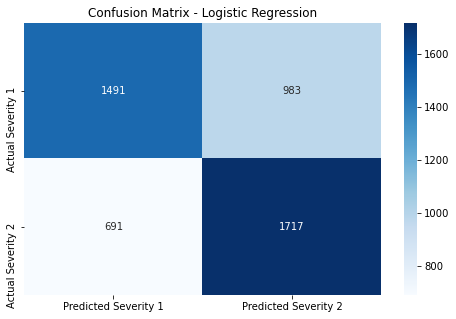

In [74]:
y_pred = M_LR.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=LR_Pred1)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

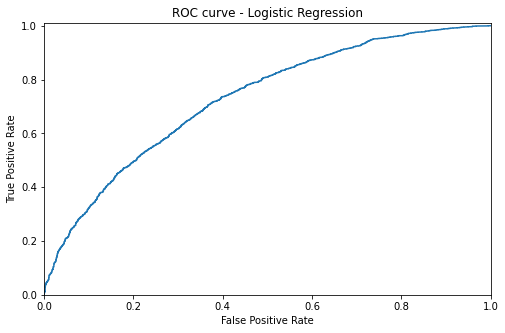

In [75]:
y_scoreLR = M_LR.predict_proba(x_test)
fpr["Logistic Regression"], tpr["Logistic Regression"], _= roc_curve(Ye[:,0], y_scoreLR[:,0])

plt.figure(figsize=(8, 5))
plt.step(tpr["Logistic Regression"],fpr["Logistic Regression"],  where="post")

plt.title("ROC curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

KNN

In [76]:
tt = x_train.shape[0]
tv = xval.shape[0]
x_train[int(tt*0.5):].shape[0], xval[int(tv*0.5):].shape[0]

(9763, 1953)

#KNN

In [77]:
ks = 17
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train[int(tt*0.5):],y_train[int(tt*0.5):])
    yhat = neigh.predict(xval[int(tv*0.5):])
    mean_acc[n-1] = accuracy_score(yval[int(tv*0.5):],yhat)
    std_acc[n-1] = np.std(yhat==yval[int(tv*0.5):])/np.sqrt(yhat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))

Best performing K is 1 with an accuracy of 0.9006656426011265


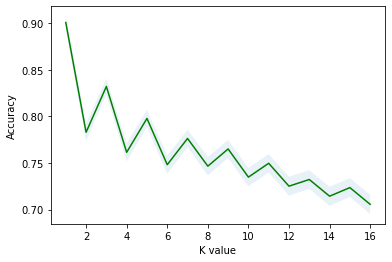

In [78]:
plt.plot(range(1,ks),mean_acc,'g')
plt.xlabel('K value')
plt.ylabel('Accuracy')
#plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)

In [79]:
model_knn = KNeighborsClassifier(n_neighbors = 3, n_jobs=-1)
model_knn.fit(x_train,y_train)
LR_Pred = M_LR.predict(x_train)

knn_Pred1 = model_knn.predict(x_test)
acc_knn = round(model_knn.score(x_train, y_train) * 100, 2)
acc_knn1 = round(model_knn.score(x_test, y_test) * 100, 2)
f1_Score1 = round(f1_score(y_test, knn_Pred1, average='macro') * 100, 2)
P_Score1 = round(precision_score(y_test, knn_Pred1, average='macro') * 100, 2)
R_Score1 = round(recall_score(y_test, knn_Pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_lr1)
precision_lst.append(P_Score1)
f1Score_lst.append(f1_Score1)
print("\nTrain Accuracy", acc_lr)
print("Test Accuracy", acc_lr1)
print("F1 Score", f1_Score1)
print("Precision Score", P_Score1)
print("Recall Score", R_Score1)


Train Accuracy 66.23
Test Accuracy 65.71
F1 Score 82.56
Precision Score 84.97
Recall Score 82.71


In [80]:
model_knn = KNeighborsClassifier(n_neighbors = 3, n_jobs=-1)
model_knn.fit(x_train,y_train)
#t_knn = time.time()-t0
#print('Time taken :' , t_knn)
yhat = model_knn.predict(x_test)
#jaccard_knn = jaccard_similarity_score(ytest,yhat)
c_knn = classification_report(y_test,yhat)
prec_knn = precision_score(y_test, yhat)
rec_knn = recall_score(y_test, yhat)
print(c_knn)

              precision    recall  f1-score   support

           1       0.77      0.95      0.85      2474
           2       0.93      0.70      0.80      2408

    accuracy                           0.83      4882
   macro avg       0.85      0.83      0.83      4882
weighted avg       0.85      0.83      0.83      4882



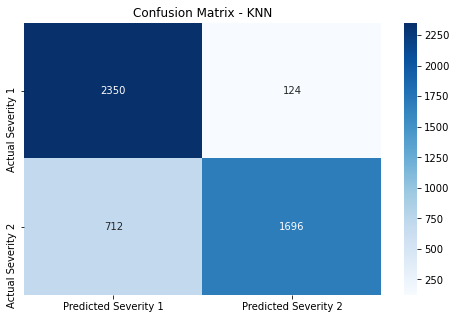

In [81]:
y_pred = model_knn.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=yhat)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()

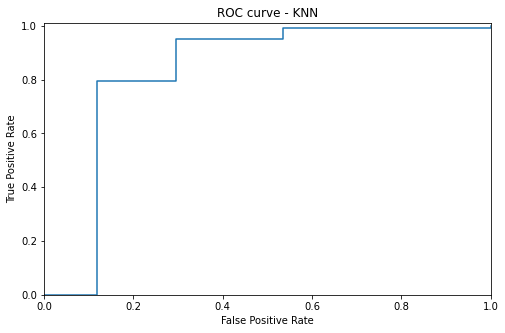

In [82]:
y_scoreKNN = model_knn.predict_proba(x_test)
fpr["KNN"], tpr["KNN"], _= roc_curve(Ye[:,0], y_scoreKNN[:,0])

plt.figure(figsize=(8, 5))
plt.step(tpr["KNN"],fpr["KNN"],  where="post")

plt.title("ROC curve - KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#NB

In [83]:
from sklearn.naive_bayes import GaussianNB
M_NB=GaussianNB()
M_NB.fit(x_train,y_train)
NB_Pred = M_NB.predict(x_train)
NB_Pred1 = M_NB.predict(x_test)

In [84]:
acc_NB = round(M_NB.score(x_train, y_train) * 100, 2)
acc_NB1 = round(M_NB.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, NB_Pred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, NB_Pred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, NB_Pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_NB1)
precision_lst.append(P_Score2)
f1Score_lst.append(f1_Score2)
recall_lst.append(R_Score2)

print("\nTrain Accuracy", acc_NB)
print("Test Accuracy", acc_NB1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)


Train Accuracy 66.87
Test Accuracy 66.55
F1 Score 65.57
Precision Score 68.25
Recall Score 66.33


In [85]:
print('\nClassification Report for Training\n')
c_nb = classification_report(y_test,NB_Pred1)
print(c_nb)


Classification Report for Training

              precision    recall  f1-score   support

           1       0.63      0.82      0.71      2474
           2       0.73      0.50      0.60      2408

    accuracy                           0.67      4882
   macro avg       0.68      0.66      0.66      4882
weighted avg       0.68      0.67      0.66      4882



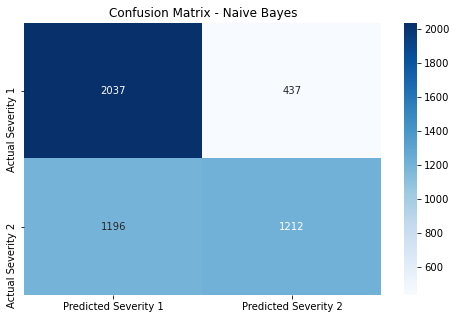

In [86]:
y_pred = M_NB.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=NB_Pred1)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

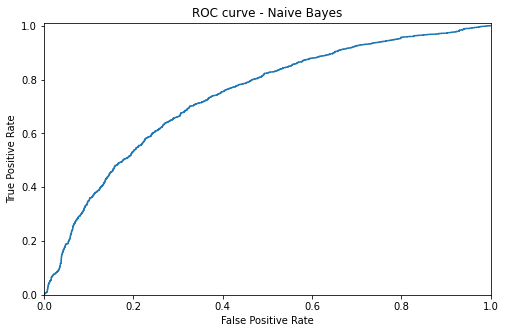

In [87]:
y_scoreNB = M_NB.predict_proba(x_test)
fpr["Naive Bayes"], tpr["Naive Bayes"], _= roc_curve(Ye[:,0], y_scoreNB[:,0])

plt.figure(figsize=(8, 5))
plt.step(tpr["Naive Bayes"],fpr["Naive Bayes"],  where="post")

plt.title("ROC curve - Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#ADABoost

In [88]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
M_ADB = AdaBoostClassifier()
M_ADB.fit(x_train,y_train)
ADB_Pred = M_ADB.predict(x_train)
ADB_Pred1 = M_ADB.predict(x_test)

In [89]:
acc_adb = round(M_ADB.score(x_train, y_train) * 100, 2)
acc_adb1 = round(M_ADB.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, ADB_Pred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, ADB_Pred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, ADB_Pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(ADB_Pred1)
precision_lst.append(P_Score2)
f1Score_lst.append(f1_Score2)
recall_lst.append(R_Score2)

print("\nTrain Accuracy", acc_adb)
print("Test Accuracy", acc_adb1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)


Train Accuracy 73.65
Test Accuracy 73.43
F1 Score 73.42
Precision Score 73.44
Recall Score 73.42


In [90]:
print('\nClassification Report for Training\n')
c_adb = classification_report(y_test,ADB_Pred1)
print(c_adb)


Classification Report for Training

              precision    recall  f1-score   support

           1       0.73      0.75      0.74      2474
           2       0.74      0.72      0.73      2408

    accuracy                           0.73      4882
   macro avg       0.73      0.73      0.73      4882
weighted avg       0.73      0.73      0.73      4882



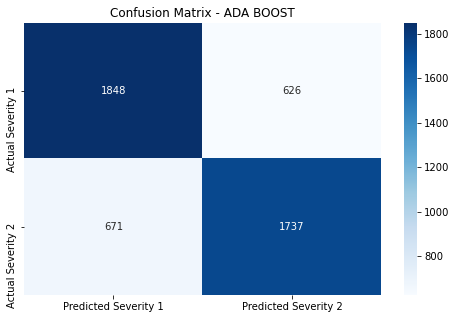

In [91]:
y_pred = M_ADB.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=ADB_Pred1)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - ADA BOOST")
plt.show()

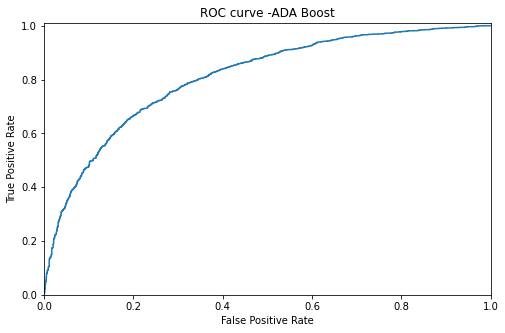

In [92]:
y_scoreADB = M_ADB.predict_proba(x_test)
fpr["ADA Boost"], tpr["ADA Boost"], _= roc_curve(Ye[:,0], y_scoreADB[:,0])

plt.figure(figsize=(8, 5))
plt.step(tpr["ADA Boost"],fpr["ADA Boost"],  where="post")

plt.title("ROC curve -ADA Boost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

#XG Boost

In [93]:
from xgboost import XGBClassifier

In [94]:
ML_XG = XGBClassifier(n_estimators=100)
ML_XG.fit(x_train,y_train)
XG_Pred = ML_XG.predict(x_train)
XG_Pred1 = ML_XG.predict(x_test)
                

C:\Users\sahmed1\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:26:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [95]:
acc_XG = round(ML_XG.score(x_train, y_train) * 100, 2)
acc_XG1 = round(ML_XG.score(x_test, y_test) * 100, 2)
f1_Score2 = round(f1_score(y_test, XG_Pred1, average='macro') * 100, 2)
P_Score2 = round(precision_score(y_test, XG_Pred1, average='macro') * 100, 2)
R_Score2 = round(recall_score(y_test, XG_Pred1, average='macro') * 100, 2)
# Append to the accuracy list
accuracy_lst.append(acc_XG1)
precision_lst.append(P_Score2)
f1Score_lst.append(f1_Score2)
recall_lst.append(R_Score2)

print("\nTrain Accuracy", acc_XG)
print("Test Accuracy", acc_XG1)
print("F1 Score", f1_Score2)
print("Precision Score", P_Score2)
print("Recall Score", R_Score2)


Train Accuracy 87.06
Test Accuracy 82.49
F1 Score 82.46
Precision Score 82.56
Recall Score 82.45


In [96]:
print('\nClassification Report for Training\n')
c_xgb = classification_report(y_test,XG_Pred1)
print(c_xgb)


Classification Report for Training

              precision    recall  f1-score   support

           1       0.81      0.85      0.83      2474
           2       0.84      0.80      0.82      2408

    accuracy                           0.82      4882
   macro avg       0.83      0.82      0.82      4882
weighted avg       0.83      0.82      0.82      4882



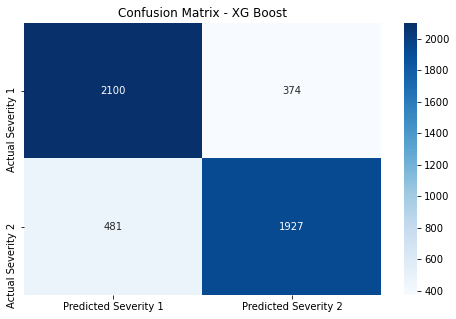

In [97]:
y_pred = ML_XG.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=XG_Pred1)

index = ["Actual Severity 1", "Actual Severity 2"]
columns = ["Predicted Severity 1", "Predicted Severity 2"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XG Boost")
plt.show()

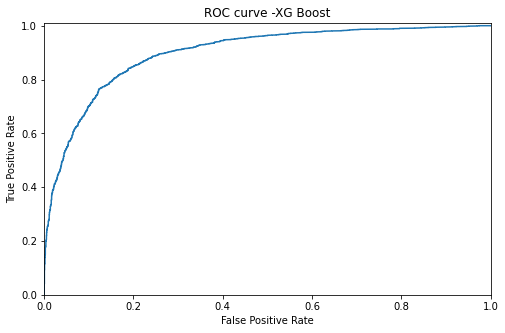

In [98]:
y_scoreXG = ML_XG.predict_proba(x_test)
fpr["XG Boost"], tpr["XG Boost"], _= roc_curve(Ye[:,0], y_scoreXG[:,0])

plt.figure(figsize=(8, 5))
plt.step(tpr["XG Boost"],fpr["XG Boost"],  where="post")

plt.title("ROC curve -XG Boost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [ ]:
#ROC Curve for Ensemble Model

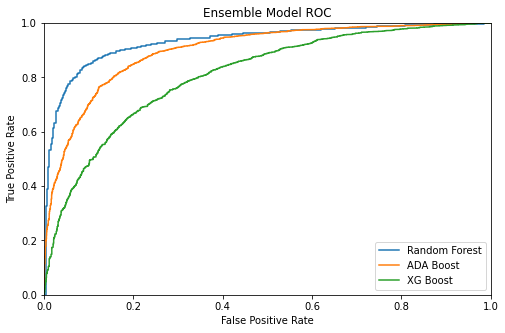

In [99]:
fpr["ADA Boost"], tpr["ADA Boost"], _= roc_curve(Ye[:,0], y_scoreADB[:,0])
fpr["XG Boost"], tpr["XG Boost"], _= roc_curve(Ye[:,0], y_scoreXG[:,0])
fpr["Random Forest"], tpr["Random Forest"], _= roc_curve(Ye[:,0], y_score[:,0])



plt.figure(figsize=(8, 5))
plt.step(tpr["Random Forest"],fpr["Random Forest"],  where="post", label='Random Forest')
plt.step(tpr["XG Boost"],fpr["XG Boost"],  where="post", label='ADA Boost')
plt.step(tpr["ADA Boost"],fpr["ADA Boost"],  where="post",label='XG Boost')
plt.title("Ensemble Model ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

#ROC Curve for Single Model

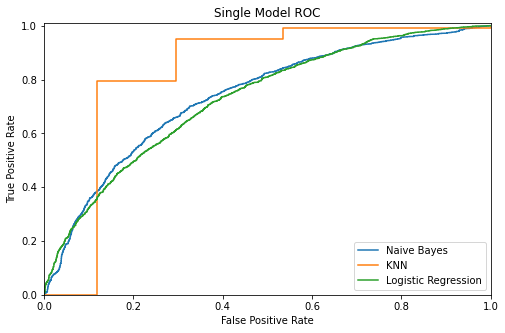

In [100]:

fpr["KNN"], tpr["KNN"], _= roc_curve(Ye[:,0], y_scoreKNN[:,0])
fpr["Logistic Regression"], tpr["Logistic Regression"], _= roc_curve(Ye[:,0], y_scoreLR[:,0])
fpr["Naive Bayes"], tpr["Naive Bayes"], _= roc_curve(Ye[:,0], y_scoreNB[:,0])

plt.figure(figsize=(8, 5))
plt.step(tpr["Naive Bayes"],fpr["Naive Bayes"],  where="post", label='Naive Bayes ')
plt.step(tpr["KNN"],fpr["KNN"],  where="post", label='KNN')
plt.step(tpr["Logistic Regression"],fpr["Logistic Regression"],  where="post", label='Logistic Regression')
plt.title("Single Model ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

In [ ]:
#ROC Curve for both model

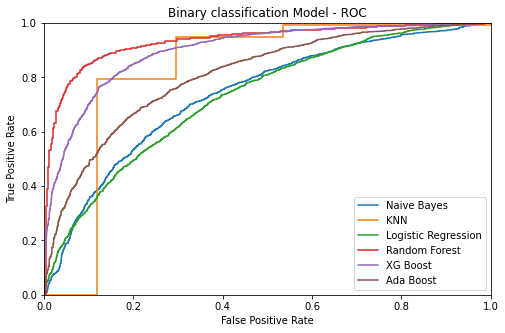

In [101]:
fpr["ADA Boost"], tpr["ADA Boost"], _= roc_curve(Ye[:,0], y_scoreADB[:,0])
fpr["XG Boost"], tpr["XG Boost"], _= roc_curve(Ye[:,0], y_scoreXG[:,0])
fpr["Random Forest"], tpr["Random Forest"], _= roc_curve(Ye[:,0], y_score[:,0])

fpr["KNN"], tpr["KNN"], _= roc_curve(Ye[:,0], y_scoreKNN[:,0])
fpr["Logistic Regression"], tpr["Logistic Regression"], _= roc_curve(Ye[:,0], y_scoreLR[:,0])
fpr["Naive Bayes"], tpr["Naive Bayes"], _= roc_curve(Ye[:,0], y_scoreNB[:,0])

plt.figure(figsize=(8, 5))
plt.step(tpr["Naive Bayes"],fpr["Naive Bayes"],  where="post", label='Naive Bayes ')
plt.step(tpr["KNN"],fpr["KNN"],  where="post", label='KNN')
plt.step(tpr["Logistic Regression"],fpr["Logistic Regression"],  where="post", label='Logistic Regression')
plt.step(tpr["Random Forest"],fpr["Random Forest"],  where="post", label='Random Forest')
plt.step(tpr["XG Boost"],fpr["XG Boost"],  where="post", label='XG Boost')
plt.step(tpr["ADA Boost"],fpr["ADA Boost"],  where="post",label='Ada Boost')
plt.title("Binary classification Model - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()